In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import tensorboard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Utils')
sys.path.append('/content/drive/MyDrive/Utils/DL/tensorflowUtils')

In [6]:
import ntfy

In [7]:
import imports
import info
info.get_version_info()

2.11.0
0.12.0
GPU available :)


In [8]:
train_df = pd.read_csv("/content/drive/MyDrive/Digit-Recognizer/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Digit-Recognizer/test.csv")

train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [9]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# convert to 28x28 matrix, withouth label col

# train data withouth label 
train_images = train_df.iloc[:,1:].values
# reshape to 28x28 -> -1 for get all the data in shape (x,), then 28x28 (size of matrix), and 1 for color chanel (if RGB 1 will be 3)
train_images = train_images.reshape(-1,28,28,1)
# Normalization (pixels goes from 0 to 255 range, so we divide it by 255 and then will be between 0 and 1)
train_images = train_images/255.0
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_images,
                                                    train_df['label'],
                                                    train_size=0.2,
                                                    random_state=42)

In [12]:
X_train.shape, y_train.shape

((8400, 28, 28, 1), (8400,))

# Simple NN with 2 dense layers

In [13]:
tf.random.set_seed(42)

INPUT_SHAPE = [None, 28, 28, 1]

# Setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
263/263 [==============================] - 9s 11ms/step - loss: 0.5852 - accuracy: 0.8349 - val_loss: 0.3165 - val_accuracy: 0.9077
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 0.2284 - accuracy: 0.9348 - val_loss: 0.2652 - val_accuracy: 0.9198
Epoch 3/30
263/263 [==============================] - 7s 26ms/step - loss: 0.1564 - accuracy: 0.9542 - val_loss: 0.2266 - val_accuracy: 0.9309
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.1144 - accuracy: 0.9656 - val_loss: 0.1946 - val_accuracy: 0.9407
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.1789 - val_accuracy: 0.9471
Epoch 6/30
263/263 [==============================] - 3s 13ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.1748 - val_accuracy: 0.9496
Epoch 7/30
263/263 [==============================] - 4s 13ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.1855 - val_accuracy: 0.9477
E

<AxesSubplot:title={'center':'Model metrics'}>

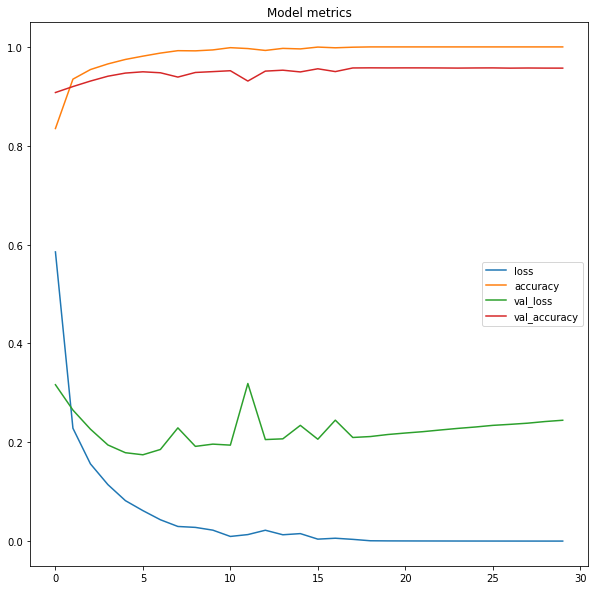

In [16]:
pd.DataFrame(history.history).plot(title='Model metrics', figsize=(10,10))

In [17]:
model.evaluate(X_test, y_test)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.2446 - accuracy: 0.9571


[0.24461376667022705, 0.957053542137146]

In [18]:
def plot_confusion_matrix(y_true, y_pred, index, columns, color='OrRd', num_fmt='d'):
    '''
    Plot a confusion matrix using Seaborn's heatmap()
    '''
    # Convert the tensor to a numpy array
    y_pred = [np.argmax(y_pred[x], 0) for x in range(len(y_pred))]

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a dataframe from the confusion matrix
    cm_df = pd.DataFrame(cm,
                            index=index,
                            columns=columns)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(cm_df, annot=True, cmap="OrRd", fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [20]:
y_preds = model.predict(X_test)

1050/1050 [==============================] - 2s 2ms/step


In [21]:
y_preds = [np.argmax(y_preds[x], 0) for x in range(len(y_preds))]

In [24]:
cm = confusion_matrix(y_test, y_preds)

In [25]:
cm_df = pd.DataFrame(cm,
                      index=np.arange(0, 10),
                      columns=np.arange(0, 10))
cm_df

,0,1,2,3,4,5,6,7,8,9
0,3279,0,10,3,5,8,12,4,9,4
1,0,3690,22,5,2,6,3,11,21,4
2,20,18,3185,35,26,5,20,39,27,5
3,7,9,58,3271,6,46,2,13,53,28
4,4,12,5,0,3113,2,15,7,13,88
5,11,3,5,53,14,2845,33,6,32,21
6,32,5,3,0,43,21,3169,3,12,0
7,4,9,26,26,21,8,1,3337,7,33
8,8,19,14,32,20,22,18,5,3090,25
9,12,11,3,31,55,12,0,39,22,3149


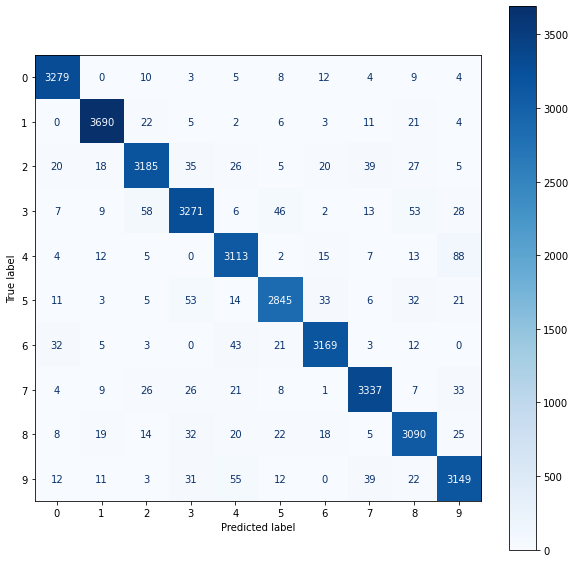

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax, cmap=plt.cm.Blues)

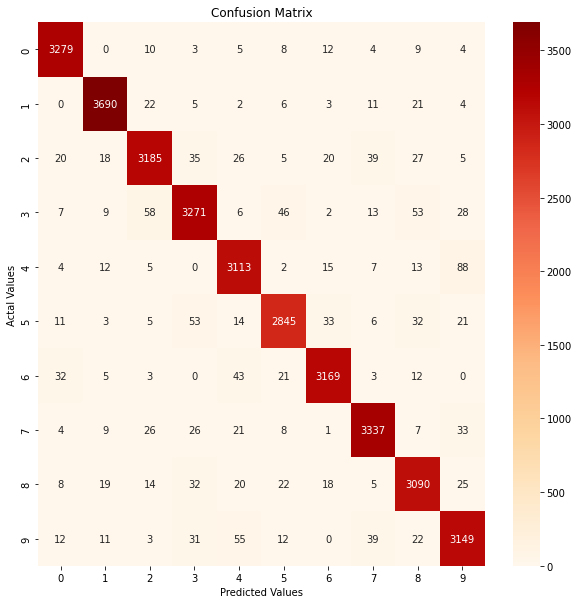

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap="OrRd", fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Digit-Recognizer/model")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Digit-Recognizer/model",
                                     custom_objects={'KerasLayer':hub.KerasLayer})

# Convolucional NN (CNN)

In [ ]:
tf.random.set_seed(42)

INPUT_SHAPE = [28, 28, 1]

# Setup the layers
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(5,5),
                           activation='relu',
                           input_shape=INPUT_SHAPE,
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

# Compile model
cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 9, 9, 32)         128       
 hNormalization)                                                 
                                                                 
 conv2d_35 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                      

In [ ]:
history = cnn_model.fit(X_train,
                        y_train,
                        epochs=30,
                        batch_size=30,
                        validation_data=(X_test, y_test))

Epoch 1/30
280/280 [==============================] - 6s 21ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0678 - val_accuracy: 0.9866
Epoch 2/30
280/280 [==============================] - 7s 25ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0722 - val_accuracy: 0.9854
Epoch 3/30
280/280 [==============================] - 5s 19ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0635 - val_accuracy: 0.9868
Epoch 4/30
280/280 [==============================] - 7s 25ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0603 - val_accuracy: 0.9879
Epoch 5/30
280/280 [==============================] - 8s 27ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0658 - val_accuracy: 0.9871
Epoch 6/30
280/280 [==============================] - 5s 16ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0631 - val_accuracy: 0.9872
Epoch 7/30
280/280 [==============================] - 7s 26ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0625 - val_accuracy: 0.9865

In [ ]:
cnn_model.save("/content/drive/MyDrive/Digit-Recognizer/cnn_model")

In [ ]:
cnn_model = tf.keras.models.load_model("/content/drive/MyDrive/Digit-Recognizer/cnn_model",
                                     custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
def randomTest(preds):
  fig, ax = plt.subplots(5, 5, figsize=(15, 15))
  for index, axi in enumerate(ax.flat):
    axi.imshow(test_images[index].reshape(28, 28), cmap='gray', interpolation='nearest')
    axi.set(xticks=[], yticks=[],
            xlabel=str(preds[index]))
  plt.show()

In [ ]:
cnn_model.predict(test_images)

875/875 [==============================] - 3s 4ms/step


array([[5.30812591e-02, 5.27782291e-02, 9.99999881e-01, ...,
        2.79648881e-03, 2.35501528e-01, 7.64713734e-02],
       [1.00000000e+00, 3.80279589e-03, 2.38571033e-01, ...,
        9.41219866e-01, 6.80374578e-02, 5.45789897e-01],
       [1.60511155e-02, 8.50361679e-03, 9.90391850e-01, ...,
        1.33845415e-02, 2.70377636e-01, 1.00000000e+00],
       ...,
       [2.46895686e-01, 1.97421104e-01, 3.26886415e-01, ...,
        6.04957640e-01, 1.24719210e-01, 4.63571966e-01],
       [1.16861142e-01, 3.91588546e-03, 9.98365581e-02, ...,
        7.96659291e-01, 1.14119940e-01, 9.99999881e-01],
       [1.20545179e-02, 3.37779261e-02, 9.99999762e-01, ...,
        8.75321799e-04, 7.37444460e-01, 1.14932314e-01]], dtype=float32)

875/875 [==============================] - 2s 2ms/step


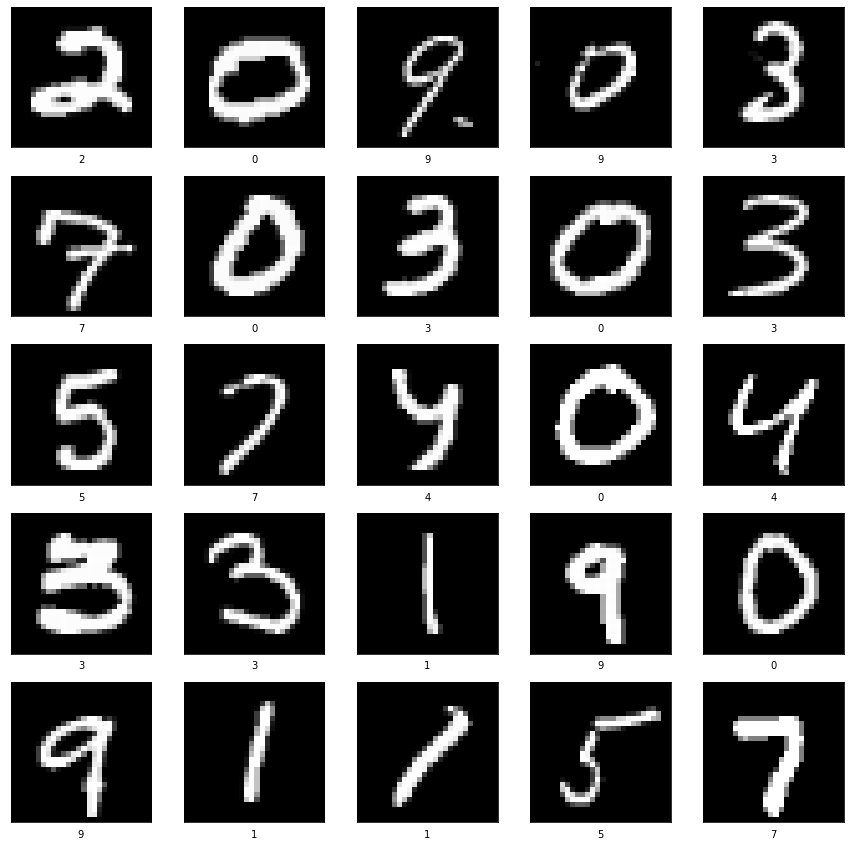

In [ ]:
import matplotlib.pyplot as plt

test_images = test_df.values.reshape(-1,28,28,1)/255.0
preds = np.argmax(cnn_model.predict(test_images), axis=1)
randomTest(preds)

# Submit to Kaggle

In [ ]:
test_images = test_df.values.reshape(-1,28,28,1)/255.0
preds = np.argmax(cnn_model.predict(test_images), axis=1)

875/875 [==============================] - 2s 3ms/step


In [ ]:
preds

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission_df = pd.DataFrame({'ImageId':test_df.index+1, 'Label':preds})
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submission_file_dir = '/content/drive/MyDrive/Digit-Recognizer/CNN-3.csv' 
submission_df.to_csv(submission_file_dir, index=False)

# Download File

In [ ]:
from google.colab import files

files.download(submission_file_dir) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>